In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [249]:
!pwd

/Users/aldodector/Downloads/cdmx_data


In [4]:
!ls

Car_Accidents_Mx_Covid.ipynb
carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv
incidentes-viales-c5.csv
victimas-en-carpetas-de-investigacion-pgj.csv


In [5]:
df = pd.read_csv('incidentes-viales-c5.csv')

In [6]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303778 entries, 0 to 1303777
Data columns (total 18 columns):
folio                1303778 non-null object
fecha_creacion       1303778 non-null object
hora_creacion        1303778 non-null object
dia_semana           1303778 non-null object
codigo_cierre        1303778 non-null object
fecha_cierre         1303778 non-null object
año_cierre           1303778 non-null int64
mes_cierre           1303778 non-null object
hora_cierre          1303778 non-null object
delegacion_inicio    1303622 non-null object
incidente_c4         1303778 non-null object
latitud              1303335 non-null float64
longitud             1303343 non-null float64
clas_con_f_alarma    1303778 non-null object
tipo_entrada         1303778 non-null object
delegacion_cierre    1303640 non-null object
geopoint             1303332 non-null object
mes                  1303778 non-null int64
dtypes: float64(2), int64(2), object(14)
memory usage: 179.0+ MB


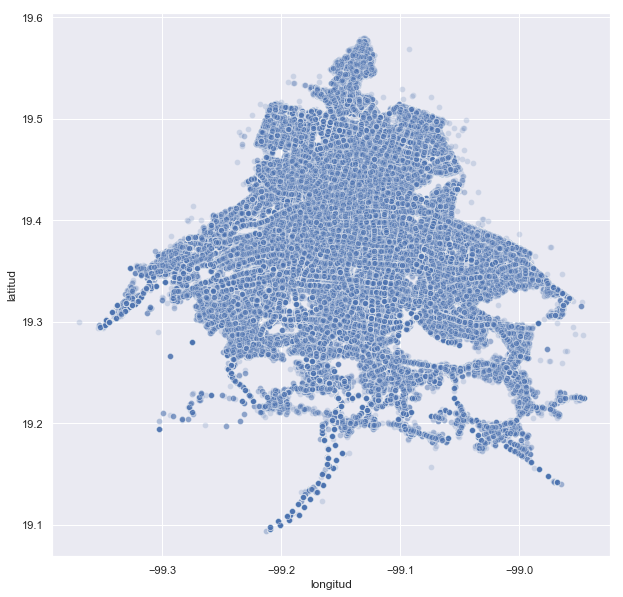

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['longitud'],y = df['latitud'],alpha=0.2,palette='viridis')
plt.show()

In [9]:
def full_date(x):
    day = x.split('/')[0]
    month = x.split('/')[1]
    year = '20'+ x.split('/')[2][-2:]
    date = year + '-'+ month + '-'+ day 
    return pd.to_datetime(date)

In [10]:
df['fecha'] = df['fecha_creacion'].apply(lambda x: full_date(x))

In [11]:
df_count = df.groupby('fecha').count().folio

In [102]:
df_count2 = pd.DataFrame(df_count).reset_index()

In [103]:
df_count2.columns

Index(['fecha', 'folio'], dtype='object')

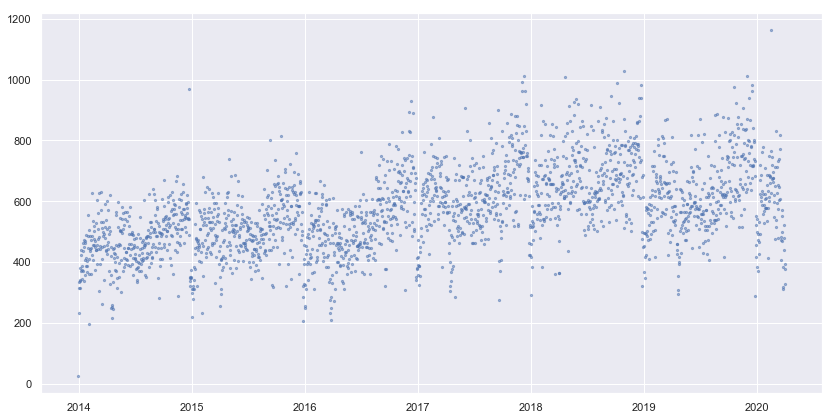

In [117]:
plt.figure(figsize=(14,7)) # All data
plt.scatter(x = df_count2['fecha'],y = df_count2['folio'],alpha = 0.5,s = 5)
plt.show()

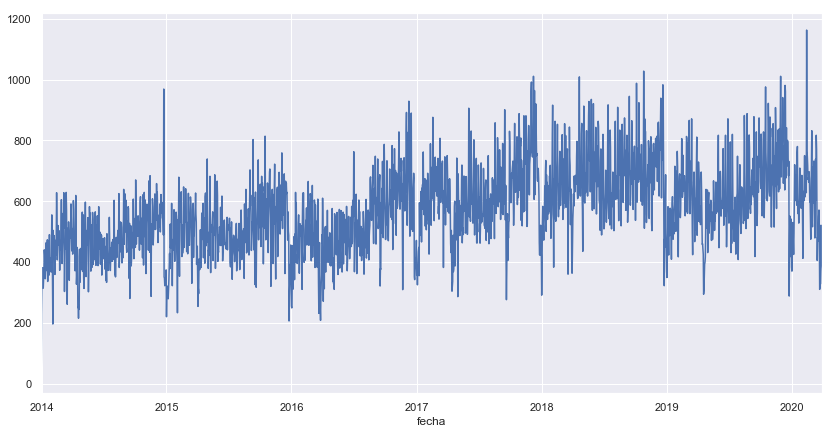

In [12]:
plt.figure(figsize=(14,7)) # All data
df_count.plot()
plt.show()

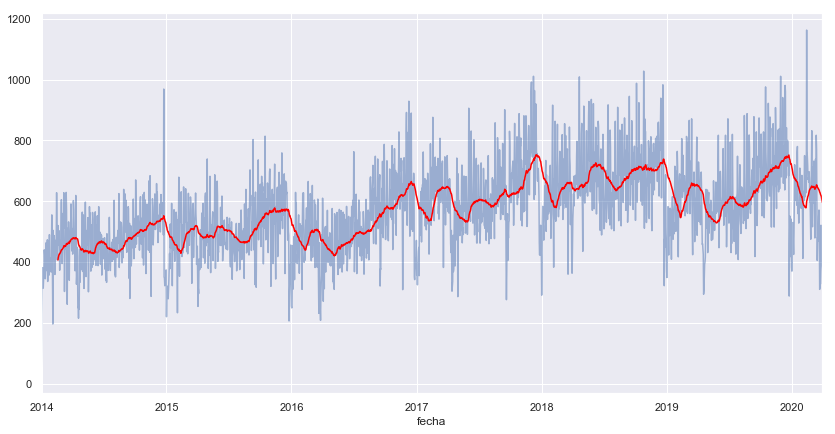

In [226]:
plt.figure(figsize=(14,7)) # All data
df_count.plot(alpha = 0.5)
df_count.rolling(50).mean().plot(color='red')
plt.show()

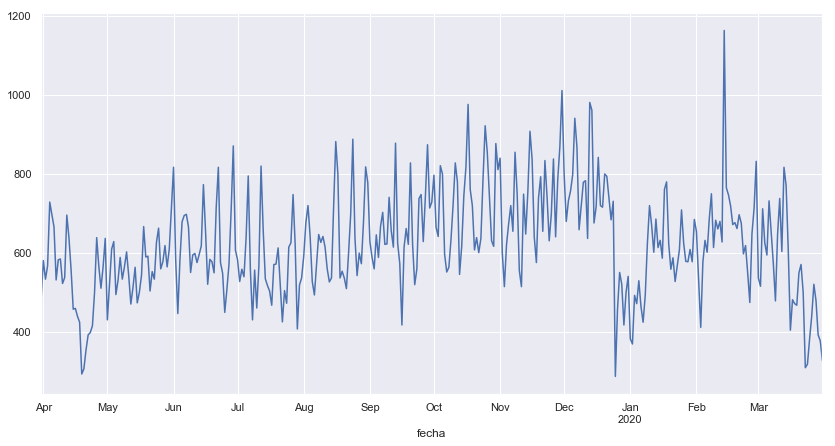

In [14]:
plt.figure(figsize=(14,7)) ## just last year of data
df_count['2019-03-31':].plot()
plt.show()

In [15]:
df_2019 =pd.DataFrame(df_count['2019-01-01':'2019-03-31']).reset_index()

In [16]:
df_2020 = pd.DataFrame(df_count['2020-01-01':'2020-03-31']).reset_index()

In [17]:
df_2020.drop(index = 59,inplace=True)

In [18]:
df_2019['day in year']=[i for i in df_2019.index]    
df_2020['day in year']=[i for i in df_2020.index]    

In [19]:
df_compare = pd.merge(df_2019,df_2020,on = 'day in year')

In [20]:
df_compare['percentage'] = ((df_compare['folio_y']-df_compare['folio_x'])/df_compare['folio_x'])*100

In [252]:
df_compare[df_compare['fecha_y'] == '2020-01-13'] # apple data begins here

,fecha_x,folio_x,day in year,fecha_y,folio_y,percentage
12,2019-01-13,561,12,2020-01-13,686,22.28164


In [214]:
df_compare[df_compare['fecha_y'] == '2020-02-28'] # first death

,fecha_x,folio_x,day in year,fecha_y,folio_y,percentage
58,2019-02-28,813,58,2020-02-28,714,-12.177122


In [22]:
df_compare[df_compare['fecha_y'] == '2020-03-18'] # first death

,fecha_x,folio_x,day in year,fecha_y,folio_y,percentage
76,2019-03-19,614,77,2020-03-18,472,-23.127036


In [23]:
df_compare[df_compare['fecha_y'] == '2020-03-24'] # phase II

,fecha_x,folio_x,day in year,fecha_y,folio_y,percentage
82,2019-03-25,609,83,2020-03-24,319,-47.619048


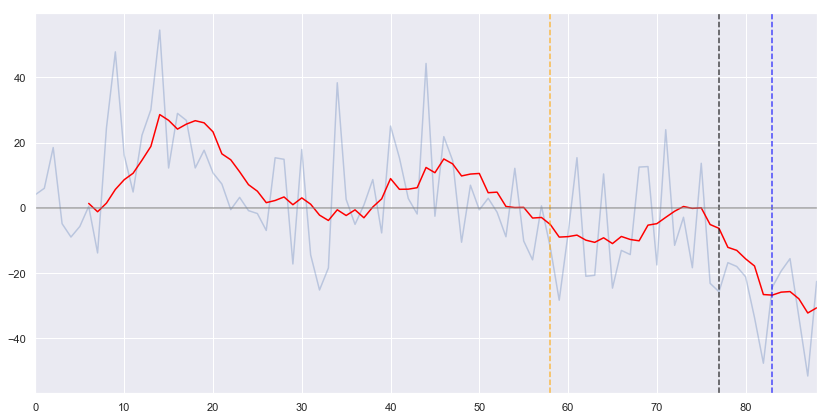

In [215]:
plt.figure(figsize=(14,7))
df_compare['percentage'].plot(alpha = 0.3)
df_compare['percentage'].rolling(7).mean().plot(color = 'red')
plt.axvline(58,color='orange',alpha=0.7,ls='--')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

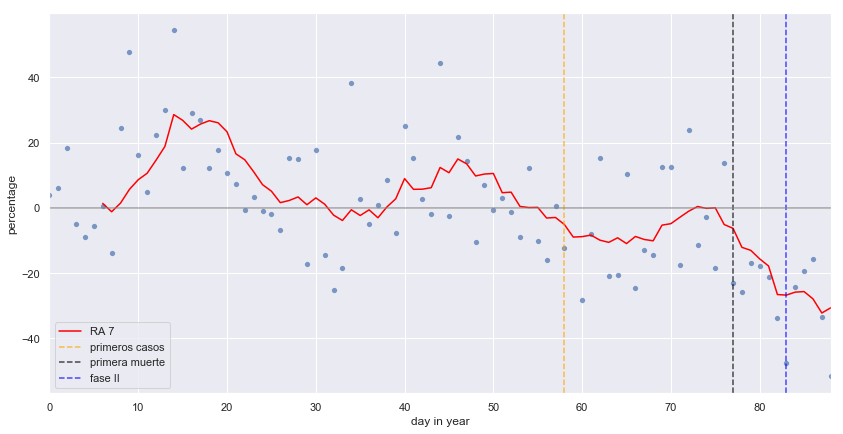

In [222]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = df_compare['day in year'],
                y = df_compare['percentage'],alpha=0.7,palette='viridis')
df_compare['percentage'].rolling(7).mean().plot(color = 'red',label ='RA 7')
plt.axvline(58,color='orange',alpha=0.7,ls='--',label = 'primeros casos')
plt.axvline(77,color='black',alpha=0.7,ls='--',label = 'primera muerte')
plt.axvline(83,color='blue',alpha=0.7,ls='--',label = 'fase II')
plt.axhline(0,color='grey',alpha=0.7)
plt.legend()
plt.show()

In [1]:
# Logistic fit

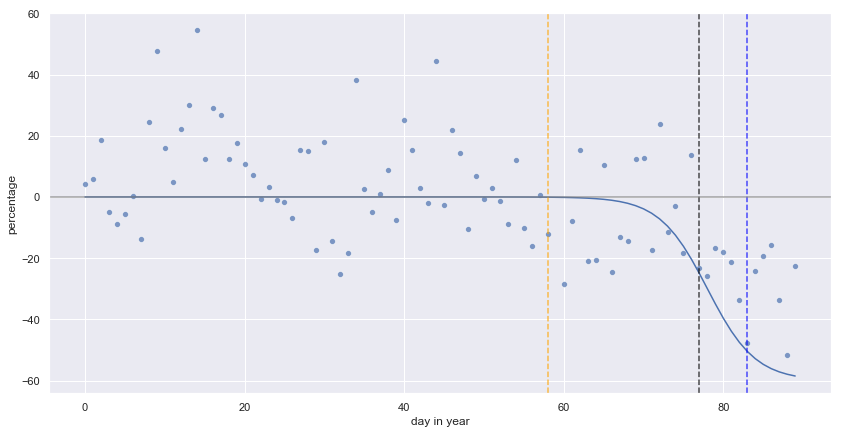

In [265]:
def logistic(t,t0,c0,a0,b0):  ## guessing parameters
  return c0 + a0/(1+np.exp((t-t0)/b0))

g = [78,-60,60,3] # make a guess
t = df_compare['day in year']
n = len(df_compare)
y = np.empty(n)
for i in range(n):
    y[i] = logistic(t[i],g[0],g[1],g[2],g[3])
plt.figure(figsize=(14,7))
sns.scatterplot(x = df_compare['day in year'],
                y = df_compare['percentage'],alpha=0.7,palette='viridis')
sns.lineplot(x = t, y = y)
#df_compare['percentage'].rolling(3).mean().plot(color = 'red')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(58,color='orange',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

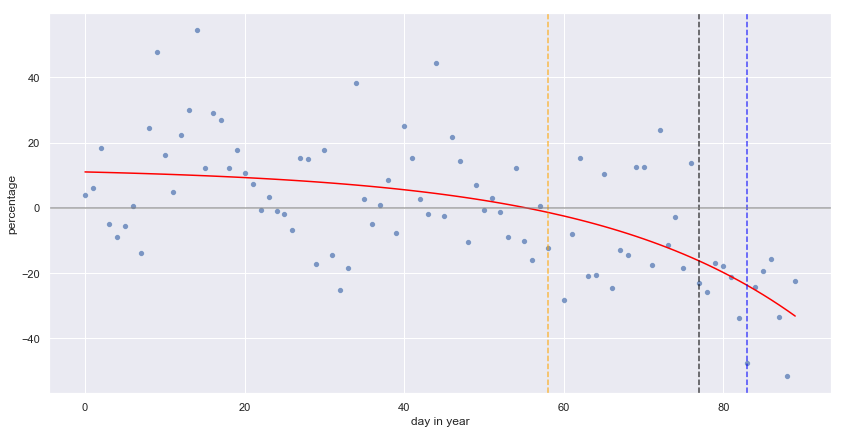

R^2:  0.3676360503592898


In [263]:
def logistic(t,t0,c0,a0,b0): 
  return c0 + a0/(1+np.exp((t-t0)/b0))


g =[78,-60,60,3]
t = df_compare['day in year'].values
pc = df_compare['percentage'].values

c, cov = curve_fit(logistic,t,pc,g)

t = df_compare['day in year']
n = len(df_compare)
y = np.empty(n)

for i in range(n):
    y[i] = logistic(t[i],c[0],c[1],c[2],c[3])

plt.figure(figsize=(14,7))
sns.scatterplot(x = df_compare['day in year'],
                y = df_compare['percentage'],alpha=0.7,palette='viridis')
sns.lineplot(x = t, y = y,color = 'red')
#df_compare['percentage'].rolling(3).mean().plot(color = 'red')
plt.axvline(58,color='orange',alpha=0.7,ls='--')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

print('R^2: ',r2_score(df_compare['percentage'],y))

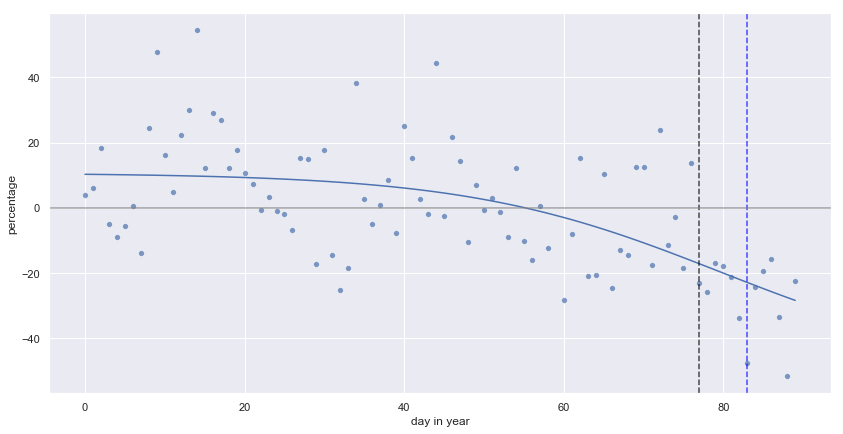

In [197]:
def logistic_red(t,t0,a0,b0): # reduced parameters
  return -50 + a0/(1+np.exp((t-t0)/b0))

g = [80,60,1.5]
t = df_compare['day in year'].values
pc = df_compare['percentage'].values

c, cov = curve_fit(logistic_red,t,pc,g)

t = df_compare['day in year']
n = len(df_compare)
y = np.empty(n)

for i in range(n):
    y[i] = logistic_red(t[i],c[0],c[1],c[2])

plt.figure(figsize=(14,7))
sns.scatterplot(x = df_compare['day in year'],
                y = df_compare['percentage'],alpha=0.7,palette='viridis')
sns.lineplot(x = t, y = y)
#df_compare['percentage'].rolling(3).mean().plot(color = 'red')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

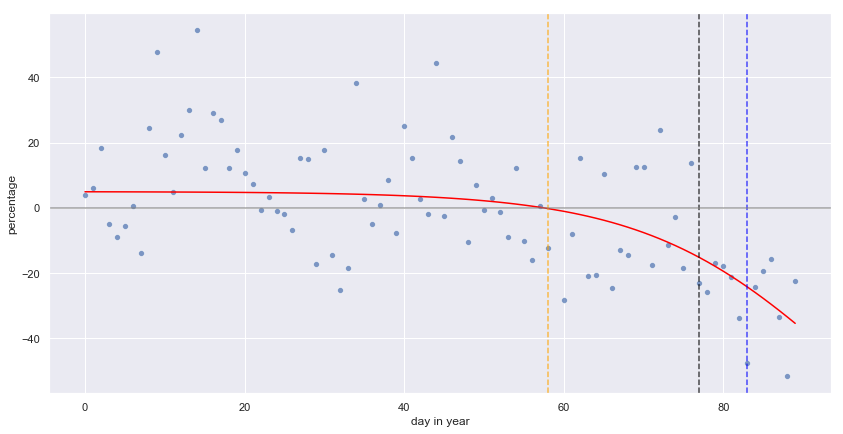

R^2:  0.3410003493113489


In [224]:
def logistic_red(t,t0,a0,b0): # fixed from above 
  return (5-a0) + a0/(1+np.exp((t-t0)/b0))

g = [77,100,1]
t = df_compare['day in year'].values
pc = df_compare['percentage'].values

c, cov = curve_fit(logistic_red,t,pc,g)

t = df_compare['day in year']
n = len(df_compare)
y = np.empty(n)

for i in range(n):
    y[i] = logistic_red(t[i],c[0],c[1],c[2])

plt.figure(figsize=(14,7))
sns.scatterplot(x = df_compare['day in year'],
                y = df_compare['percentage'],alpha=0.7,palette='viridis')
sns.lineplot(x = t, y = y,color = 'red')
#df_compare['percentage'].rolling(3).mean().plot(color = 'red')
plt.axvline(58,color='orange',alpha=0.7,ls='--')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

print('R^2: ',r2_score(df_compare['percentage'],y))

In [ ]:
# Apple data

In [274]:
apple = pd.read_csv('applemobilitytrends-2020-04-16.csv')
apple  = apple[(apple['region'] == 'Mexico') & (apple['transportation_type'] == 'driving')].T
apple = apple[3:].reset_index()
apple.columns = ['date','percentage']
apple['date'] = pd.to_datetime(apple['date'])
apple['day in year']=[i+12 for i in apple.index]

mean = apple['percentage'][:55].mean()
apple['percentage'] = apple['percentage'] - mean

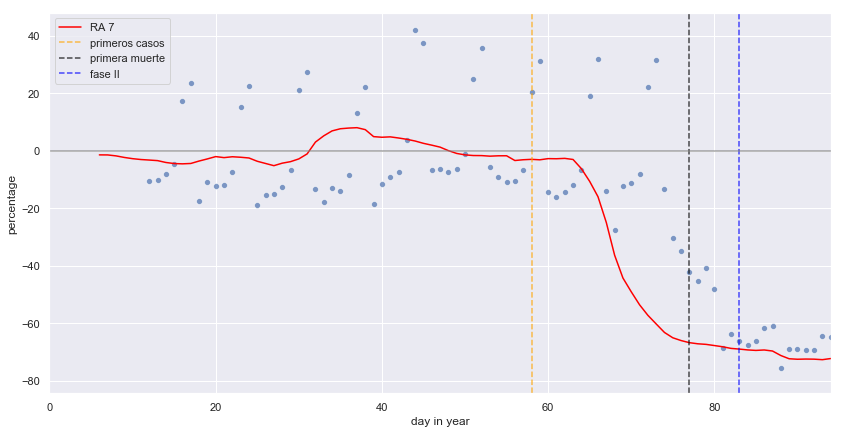

In [276]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = apple['day in year'],
                y = apple['percentage'],alpha=0.7,palette='viridis')
apple['percentage'].rolling(7).mean().plot(color = 'red',label ='RA 7')
plt.axvline(58,color='orange',alpha=0.7,ls='--',label = 'primeros casos')
plt.axvline(77,color='black',alpha=0.7,ls='--',label = 'primera muerte')
plt.axvline(83,color='blue',alpha=0.7,ls='--',label = 'fase II')
plt.axhline(0,color='grey',alpha=0.7)
plt.legend()
plt.show()

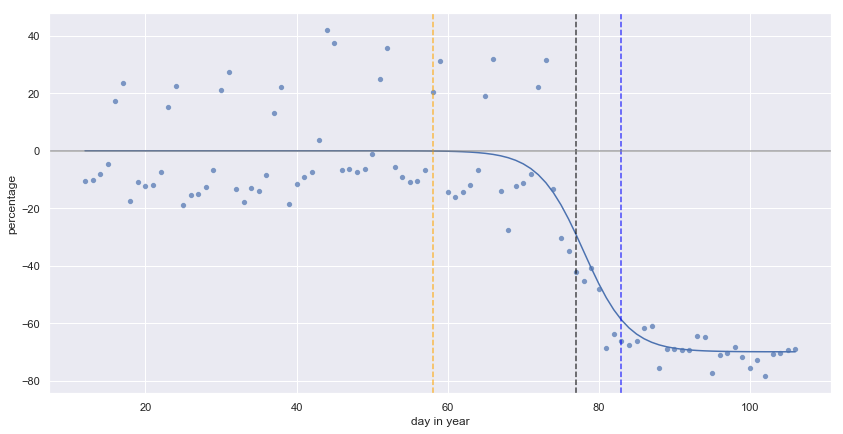

In [283]:
def logistic(t,t0,c0,a0,b0):  ## guessing parameters
  return c0 + a0/(1+np.exp((t-t0)/b0))

g = [78,-70,70,3] # make a guess
t = apple['day in year']
n = len(apple)
y = np.empty(n)
for i in range(n):
    y[i] = logistic(t[i],g[0],g[1],g[2],g[3])
plt.figure(figsize=(14,7))
sns.scatterplot(x = apple['day in year'],
                y = apple['percentage'],alpha=0.7,palette='viridis')
sns.lineplot(x = t, y = y)
#df_compare['percentage'].rolling(3).mean().plot(color = 'red')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(58,color='orange',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

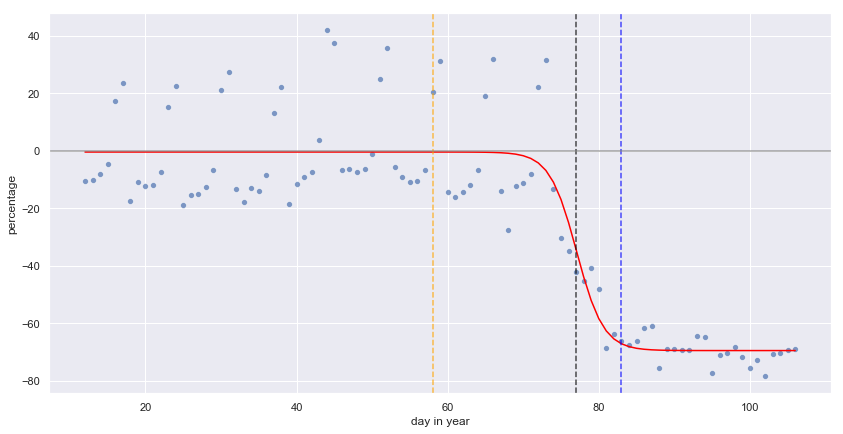

R^2:  0.8098147112341634


In [281]:
def logistic(t,t0,c0,a0,b0): 
  return c0 + a0/(1+np.exp((t-t0)/b0))


g =[78,-60,60,3]
t = apple['day in year'].values
pc = apple['percentage'].values

c, cov = curve_fit(logistic,t,pc,g)

t = apple['day in year']
n = len(apple)
y = np.empty(n)

for i in range(n):
    y[i] = logistic(t[i],c[0],c[1],c[2],c[3])

plt.figure(figsize=(14,7))
sns.scatterplot(x = apple['day in year'],
                y = apple['percentage'],alpha=0.7,palette='viridis')
sns.lineplot(x = t, y = y,color = 'red')
#df_compare['percentage'].rolling(3).mean().plot(color = 'red')
plt.axvline(58,color='orange',alpha=0.7,ls='--')
plt.axvline(77,color='black',alpha=0.7,ls='--')
plt.axvline(83,color='blue',alpha=0.7,ls='--')
plt.axhline(0,color='grey',alpha=0.7)
plt.show()

print('R^2: ',r2_score(apple['percentage'],y))

In [282]:
c

array([ 77.06396426, -69.56420527,  69.12517369,   1.78025903])

In [285]:
compare = pd.merge(apple,df_compare,on = 'day in year')
compare['percentage_x'] = pd.to_numeric(compare['percentage_x'])

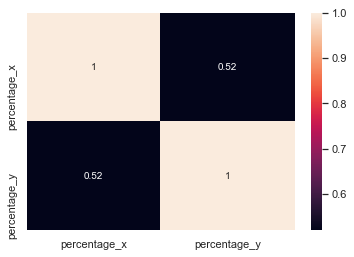

In [302]:
sns.heatmap(compare[['percentage_x','percentage_y']].corr(),annot=True)
plt.show()

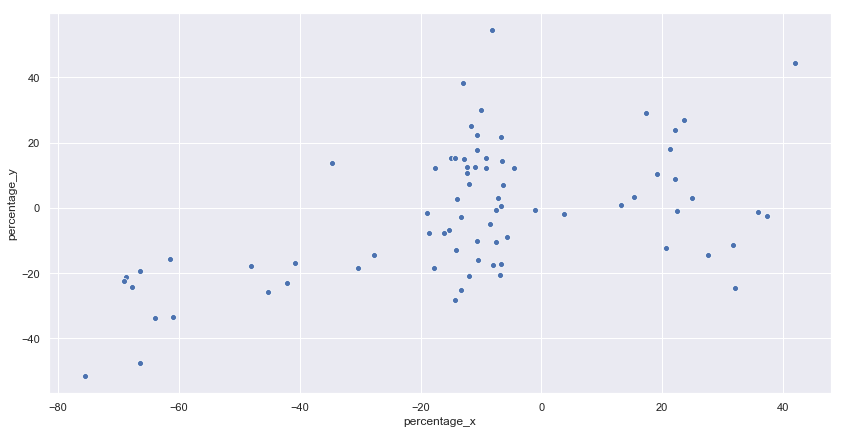

In [292]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = compare['percentage_x'],y = compare['percentage_y'])
plt.show()

Text(0,0.5,'PSD (dB)')

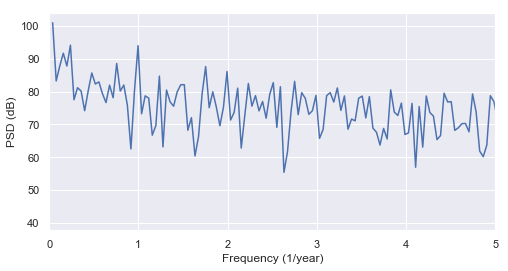

In [241]:
import scipy as sp
import scipy.fftpack

temp_fft = sp.fftpack.fft(df_count)
temp_psd = np.abs(temp_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 91)
i = fftfreq > 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')